### Homework 03 - Programming and critical analysis (ist1102082, ist1103252)


Exercise 1)
Loading the data from the csv file and converting it into a dataframe

In [29]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error

df = pd.read_csv('winequality-red.csv', sep=';')
df.head()

X = df.drop('quality', axis=1)
y = df['quality']



Perform a Multi Layer Perceptron Regression using the given parameters

In [30]:
# Set the MLPRegressor parameters
activation = "relu"  # Rectified Linear Unit (ReLU) activation
residuals = []

# Split the dataset into a training and test set with a fixed seed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Perform 10 runs with different random states and collect residuals
for random_state in range(1, 11):
    # Create an MLP Regressor with the specified parameters
    mlp_regressor = MLPRegressor(hidden_layer_sizes=(10, 10), activation=activation, 
                                validation_fraction=0.2, random_state=random_state)
    
    # Train the MLP regressor
    mlp_regressor.fit(X_train, y_train)
    
    # Make predictions
    y_pred = mlp_regressor.predict(X_test)
    
    # Calculate residuals (absolute errors)
    residuals.extend(np.abs(y_test - y_pred))


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

##### Plot the distribution of residuals using a histogram

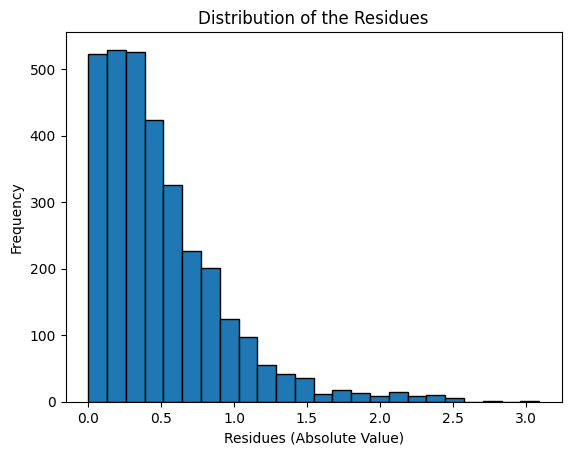

In [31]:
# Plot the distribution of residuals using a histogram
plt.hist(residuals, bins=24, edgecolor='k',)
plt.title("Distribution of the Residues")
plt.xlabel("Residues (Absolute Value)")
plt.ylabel("Frequency")
plt.show()

Exercise 2)


We will perform the regression again with the same parameters, but we will calculate the MAE (Mean Absolute Error) with and without rounding and bounding. For the bounds we have decided to go within an interval of (5, 6) and we will round to one decimal place.

In [32]:
mae_round_bound = []    # Mean absolute error rounded and bounded
mae = []                # Mean absolute error without rounding and bounding

# Perform 10 runs with different random states and collect residuals
for random_state in range(1, 11):
    # Split the dataset into a training and test set with a fixed seed
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    # Create an MLP Regressor with the specified parameters
    mlp_regressor = MLPRegressor(hidden_layer_sizes=(10, 10), activation=activation, 
                                validation_fraction=0.2, random_state=random_state, max_iter=1000)
    
    # Train the MLP regressor
    mlp_regressor.fit(X_train, y_train)
    
    mae.append(mean_absolute_error(y_test, y_pred))
    
    ## Round and Bound
    round_pred = np.round(y_pred)
    y_pred_round_bound = np.clip(round_pred, 5, 6)
    mae_round_bound.append(mean_absolute_error(y_test, y_pred_round_bound))
    
    # Make predictions
    y_pred = mlp_regressor.predict(X_test)
    
    # Calculate residuals (absolute errors)
    residuals.extend(np.abs(y_test - y_pred))
    
print("Average MAE without rounding and bounding:", np.mean(mae))
print("Average MAE with rounding and bounding: ", np.mean(mae_round_bound))

Average MAE without rounding and bounding: 0.749842073837991
Average MAE with rounding and bounding:  0.6834375


As we can observe, the MAE is lower when we round and bound the values. By rounding the predictions to the nearest integer, we are now conforming the model's outputs to the problem's requirement. This can lead to more accurate predictions and thus lower MAE because the predictions align with the target variable's nature.Furthermore, bounding the values eliminates outliers that may be present in the data. This can also lead to more accurate predictions and thus lower MAE.